In [1]:
import pandas as pd

df = pd.read_csv("cleaned_bank_churn.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age_Group,Tenure_Group,Balance_Salary_Ratio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-Aged,New,0.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-Aged,New,0.744670
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-Aged,Long-Term,1.401362
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Middle-Aged,New,0.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-Aged,New,1.587035


In [2]:
#KPI 1-TOTAL CUSTOMERS
## 1. Total Customers
#Formula: Total records in dataset
total_customers = df.shape[0]
total_customers

10000

In [4]:
#KPI 2-CUSTOMER CHURN RATE
## 2. Customer Churn Rate
#Formula: (Churned Customers / Total Customers) × 100
churn_rate = df['churn'].mean() * 100
round(churn_rate, 2)

np.float64(20.37)

In [5]:
#KPI 3-CUSTOMER RETENTION RATE
## 2. Customer Churn Rate
#Formula: (Churned Customers / Total Customers) × 100
retention_rate = 100 - churn_rate
round(retention_rate, 2)

np.float64(79.63)

In [7]:
#KPI 4-AVERAGE ACCOUNT BALANCE
## 4. Average Account Balance
#Formula: Total Balance / Total Customers
avg_balance = df['balance'].mean()
round(avg_balance, 2)

np.float64(76485.89)

In [8]:
#KPI 5-AVERAGE PRODUCTS PER CUSTOMER
## 4. Average Account Balance
#Formula: Total Balance / Total Customers
avg_products = df['products_number'].mean()
round(avg_products, 2)

np.float64(1.53)

In [9]:
#ALL KPI'S 
print("Total Customers:", total_customers)
print("Churn Rate (%):", round(churn_rate,2))
print("Retention Rate (%):", round(retention_rate,2))
print("Average Balance:", round(avg_balance,2))
print("Average Products per Customer:", round(avg_products,2))

Total Customers: 10000
Churn Rate (%): 20.37
Retention Rate (%): 79.63
Average Balance: 76485.89
Average Products per Customer: 1.53


In [2]:
import pandas as pd

df = pd.read_csv("cleaned_bank_churn.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age_Group,Tenure_Group,Balance_Salary_Ratio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-Aged,New,0.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-Aged,New,0.744670
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-Aged,Long-Term,1.401362
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Middle-Aged,New,0.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-Aged,New,1.587035


In [3]:
def segment_customer(balance):
    if balance > 100000:
        return "High Value"
    elif balance > 50000:
        return "Medium Value"
    else:
        return "Low Value"

df['Customer Segment'] = df['balance'].apply(segment_customer)

In [4]:
df['Customer Segment'].value_counts()

Customer Segment
High Value      4799
Low Value       3692
Medium Value    1509
Name: count, dtype: int64

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Age_Group,Tenure_Group,Balance_Salary_Ratio,Customer Segment
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-Aged,New,0.000000,Low Value
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-Aged,New,0.744670,Medium Value
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-Aged,Long-Term,1.401362,High Value
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Middle-Aged,New,0.000000,Low Value
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-Aged,New,1.587035,High Value


In [6]:
df.to_csv("task3_segmented_bank_churn.csv", index=False)

In [7]:
#Which customer segment has the highest churn?
pd.crosstab(df['Customer Segment'], df['churn'], normalize='index') * 100

churn,0,1
Customer Segment,,
High Value,74.765576,25.234424
Low Value,85.752979,14.247021
Medium Value,80.119284,19.880716


In [8]:
#Do segments truly represent different financial value?
df.groupby('Customer Segment')['balance'].mean()

Customer Segment
High Value      132391.094265
Low Value          801.344772
Medium Value     83867.108416
Name: balance, dtype: float64

In [9]:
#Are high-value customers using more products?
df.groupby('Customer Segment')['products_number'].mean()

Customer Segment
High Value      1.385289
Low Value       1.777627
Medium Value    1.385686
Name: products_number, dtype: float64

In [10]:
#Are certain segments concentrated in specific countries?
pd.crosstab(df['Customer Segment'], df['country'])

country,France,Germany,Spain
Customer Segment,,,
High Value,1908,1966,925
Low Value,2459,19,1214
Medium Value,647,524,338


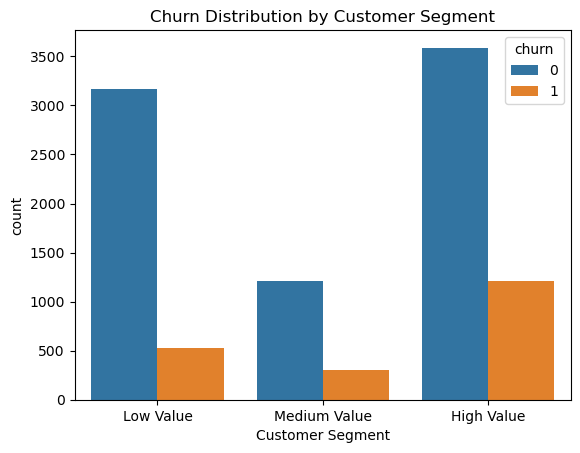

In [11]:
#visualization
#1. Segment vs Churn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Customer Segment', hue='churn', data=df)
plt.title("Churn Distribution by Customer Segment")
plt.show()

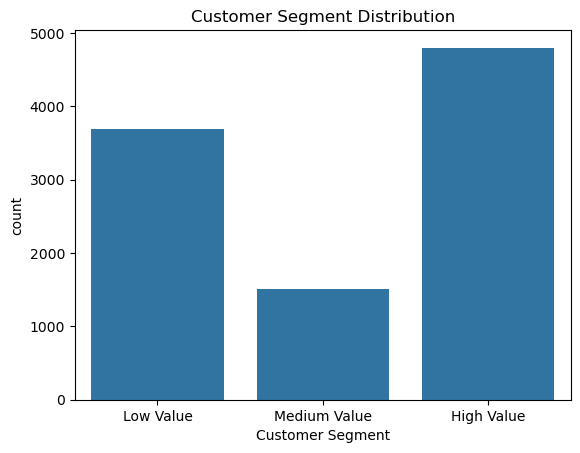

In [12]:
#Segment Distribution
sns.countplot(x='Customer Segment', data=df)
plt.title("Customer Segment Distribution")
plt.show()

In [13]:
df.to_csv("task3_segmented_bank_churn.csv", index=False)

In [14]:
df.to_csv("task3_segmented_bank_churn.csv", index=False, sep=',')

In [15]:
df.to_csv("task3_segmented_bank_churn.csv", 
          index=False, 
          encoding="utf-8-sig")